# KNN(K-Nearest Neighbor: 최근접 이웃 알고리즘)
- 지도학습 : y레이블 있음
- 비지도학습 : y레이블 없음
- KNN은 지도학습에 해당
- P.308~318

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. 데이터 준비

In [ ]:
df = sns.load_dataset('titanic')
print(df.head())   

   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]


## 2. 데이터 탐색

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  
print(rdf.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


In [ ]:
rdf.isna().sum() 

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alive           0
alone           0
dtype: int64

In [ ]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  
print(len(rdf))

714


In [ ]:
# survived : 생존이 1, 사망이 0
# 나이가 어릴수록 생존율이 높음. -값 나옴
rdf.corr() # 다양한 이유로(성별, 나이 등) survived와 age의 상관계수가 낮게 나옴

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189,-0.552936,-0.196140
pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182,0.099021,0.146320
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329,-0.310463,-0.629818
parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119,-0.363079,-0.577524
fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000,-0.179740,-0.260136
adult_male,-0.552936,0.099021,0.280328,-0.310463,-0.363079,-0.179740,1.000000,0.396632
alone,-0.196140,0.146320,0.198270,-0.629818,-0.577524,-0.260136,0.396632,1.000000


In [ ]:
rdf[rdf.sex=='male'].corr() # 고령자가 있어서 survived와 age의 상관계수가 낮게 나옴

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.221893,-0.119618,-0.016908,0.098726,0.183421,-0.246323,-0.132735
pclass,-0.221893,1.000000,-0.392754,0.056253,-0.042630,-0.486482,-0.110147,0.178073
age,-0.119618,-0.392754,1.000000,-0.334982,-0.232419,0.077331,0.536159,0.211858
sibsp,-0.016908,0.056253,-0.334982,1.000000,0.478161,0.163829,-0.602361,-0.680127
parch,0.098726,-0.042630,-0.232419,0.478161,1.000000,0.311899,-0.516077,-0.596347
fare,0.183421,-0.486482,0.077331,0.163829,0.311899,1.000000,-0.048333,-0.335899
adult_male,-0.246323,-0.110147,0.536159,-0.602361,-0.516077,-0.048333,1.000000,0.427967
alone,-0.132735,0.178073,0.211858,-0.680127,-0.596347,-0.335899,0.427967,1.000000


In [ ]:
rdf[(rdf.sex=='male') & (rdf['age']<30)].corr() 

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.230821,-0.283040,-0.050946,0.236309,0.101925,-0.339703,-0.218943
pclass,-0.230821,1.000000,-0.070599,0.078312,-0.131498,-0.637715,-0.022959,0.200252
age,-0.283040,-0.070599,1.000000,-0.522689,-0.650397,-0.108302,0.853835,0.489356
sibsp,-0.050946,0.078312,-0.522689,1.000000,0.591787,0.231176,-0.628145,-0.681062
parch,0.236309,-0.131498,-0.650397,0.591787,1.000000,0.429656,-0.702921,-0.671577
fare,0.101925,-0.637715,-0.108302,0.231176,0.429656,1.000000,-0.143227,-0.387947
adult_male,-0.339703,-0.022959,0.853835,-0.628145,-0.702921,-0.143227,1.000000,0.568303
alone,-0.218943,0.200252,0.489356,-0.681062,-0.671577,-0.387947,0.568303,1.000000


In [ ]:
tmp = rdf[(rdf.pclass==3)] # 객실 등급에 따라 survived와 age의 상관계수가 다름
tmp[(tmp.sex=='male') & (tmp.age<30)].corr() 

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,NaN,-0.125632,-0.083791,0.099899,-0.015207,-0.182742,-0.110370
pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,-0.125632,NaN,1.000000,-0.633480,-0.690664,-0.494427,0.835118,0.551316
sibsp,-0.083791,NaN,-0.633480,1.000000,0.728975,0.776830,-0.737404,-0.752813
parch,0.099899,NaN,-0.690664,0.728975,1.000000,0.680097,-0.747831,-0.688372
fare,-0.015207,NaN,-0.494427,0.776830,0.680097,1.000000,-0.615092,-0.532739
adult_male,-0.182742,NaN,0.835118,-0.737404,-0.747831,-0.615092,1.000000,0.631679
alone,-0.110370,NaN,0.551316,-0.752813,-0.688372,-0.532739,0.631679,1.000000


In [ ]:
tmp = rdf[(rdf.pclass==2)] 
tmp[(tmp.sex=='male') & (tmp.age<30)].corr() 

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,NaN,-0.883493,0.302318,0.665392,0.069790,-0.936117,-0.525169
pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,-0.883493,NaN,1.000000,-0.298291,-0.659491,-0.144806,0.917501,0.487331
sibsp,0.302318,NaN,-0.298291,1.000000,0.344711,0.438113,-0.350183,-0.802203
parch,0.665392,NaN,-0.659491,0.344711,1.000000,0.210574,-0.723113,-0.696358
fare,0.069790,NaN,-0.144806,0.438113,0.210574,1.000000,-0.111388,-0.391154
adult_male,-0.936117,NaN,0.917501,-0.350183,-0.723113,-0.111388,1.000000,0.590788
alone,-0.525169,NaN,0.487331,-0.802203,-0.696358,-0.391154,0.590788,1.000000


- 객실 등급별 성별별 데이터 분포 다양하게 확인해야 함

In [ ]:
tmp = rdf[(rdf.pclass==3) & (rdf.sex=='male')] 
tmp.describe()

,survived,pclass,age,sibsp,parch,fare
count,253.000000,253.0,253.000000,253.000000,253.000000,253.000000
mean,0.150198,3.0,26.507589,0.490119,0.256917,12.162695
std,0.357973,0.0,12.159514,1.121976,0.667560,10.129882
min,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,0.000000,3.0,20.000000,0.000000,0.000000,7.750000
50%,0.000000,3.0,25.000000,0.000000,0.000000,7.925000
75%,0.000000,3.0,33.000000,0.000000,0.000000,9.500000
max,1.000000,3.0,74.000000,5.000000,5.000000,56.495800


In [ ]:
tmp = rdf[(rdf.pclass==1) & (rdf.sex=='male')] 
tmp.describe()

,survived,pclass,age,sibsp,parch,fare
count,101.000000,101.0,101.000000,101.000000,101.000000,101.000000
mean,0.396040,1.0,41.281386,0.376238,0.336634,71.142781
std,0.491512,0.0,15.139570,0.580543,0.711017,80.430599
min,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.0,30.000000,0.000000,0.000000,29.700000
50%,0.000000,1.0,40.000000,0.000000,0.000000,52.000000
75%,1.000000,1.0,51.000000,1.000000,0.000000,79.200000
max,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


In [ ]:
# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
print(most_freq)
print('\n')

print(rdf.describe(include='all'))
print('\n')

rdf['embarked'].fillna(most_freq, inplace=True)

S


          survived      pclass   sex         age  ...  who  adult_male  alive alone
count   714.000000  714.000000   714  714.000000  ...  714         714    714   714
unique         NaN         NaN     2         NaN  ...    3           2      2     2
top            NaN         NaN  male         NaN  ...  man        True     no  True
freq           NaN         NaN   453         NaN  ...  413         413    424   404
mean      0.406162    2.236695   NaN   29.699118  ...  NaN         NaN    NaN   NaN
std       0.491460    0.838250   NaN   14.526497  ...  NaN         NaN    NaN   NaN
min       0.000000    1.000000   NaN    0.420000  ...  NaN         NaN    NaN   NaN
25%       0.000000    1.000000   NaN   20.125000  ...  NaN         NaN    NaN   NaN
50%       0.000000    2.000000   NaN   28.000000  ...  NaN         NaN    NaN   NaN
75%       1.000000    3.000000   NaN   38.000000  ...  NaN         NaN    NaN   NaN
max       1.000000    3.000000   NaN   80.000000  ...  NaN         NaN  

## 3. 분석에 사용할 속성을 선택

In [ ]:
# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.head()   

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환(pclass는 더미변수화를 하지 않은 경우이다.)
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

In [ ]:
ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head()) 

   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1




## 4. 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [ ]:
# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

In [ ]:
X.describe()

,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2.236695,29.699118,0.512605,0.431373,0.365546,0.634454,0.182073,0.039216,0.778711
std,0.838250,14.526497,0.929783,0.853289,0.481921,0.481921,0.386175,0.194244,0.415405
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,38.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X) # 평균을 0으로 분산을 1로 만드는 표준화(정규화) 작업

In [ ]:
type(X)
X[0] # 1번 자료의 9개 필드
X[0][0] # 1번 자료의 pclass

0.9112323732939666

In [ ]:
X[:][0] # X[0]와 동일

array([ 0.91123237, -0.53037664,  0.52457013, -0.50589515, -0.75905134,
        0.75905134, -0.47180795, -0.20203051,  0.53307848])

In [ ]:
ageList=[]

for i in X:
    ageList.append(i[1])

np.min(ageList), np.max(ageList), np.mean(ageList), np.var(ageList) # 평균이 0, 분산이 1에 수렴

(-2.0169791879680417, 3.4651260350566906, 2.338621049070358e-16, 1.0)

In [ ]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


##  5. KNN 분류 모형 - sklearn 사용

In [ ]:
# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5) # 중요한 이슈 : n_neighbors(주변의 갯수, 이웃)의 수

# train data를 가지고 모형 학습
knn.fit(X_train, y_train)   

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# test data를 가지고 y_hat을 예측 (분류) 
y_hat = knn.predict(X_test)

# print(y_hat[0:10])
# print(y_test.values[0:10])
tmp = y_hat-y_test.values # 같은 값이면 0, 다른 값이면 0이 아닌 자료가 나옴

cnt = 0
for i in tmp:
    if i!=0:
        cnt+=1

errRate = cnt/len(tmp)*100 # 오류율
cnt, errRate, 100-errRate # 오류 개수, 오류율, 성공률

(41, 19.069767441860467, 80.93023255813954)

In [ ]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
knn_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(knn_matrix)

[[109  16]
 [ 25  65]]


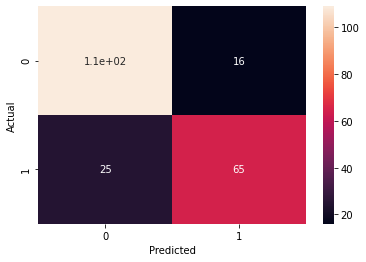

In [ ]:
# 혼동행렬 시각화
sns.heatmap(knn_matrix, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)            
print(knn_report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.80      0.72      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



In [ ]:
# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 

n = [7,5,3,2]

for i in n: # for를 사용하지 않고 gridSearch로 작업함.
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train)   
    y_hat = knn.predict(X_test)
    knn_report = metrics.classification_report(y_test, y_hat)   
    print(f'{i}-----------------')
    print(knn_report) # accuracy 확인

7-----------------
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       125
           1       0.83      0.67      0.74        90

    accuracy                           0.80       215
   macro avg       0.81      0.79      0.79       215
weighted avg       0.81      0.80      0.80       215

5-----------------
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.80      0.72      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215

3-----------------
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       125
           1       0.81      0.68      0.74        90

    accuracy                           0.80       215
   macro avg       0.80      0.78      0.79       215
weighted avg     